In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from qutip import *
from scipy import linalg
N = 2
pi =  3.1415926535
wq = 1.0 #qubit frequency
Gf = 0.0 #phase relaxation
Ge = 0.0 #ergy relaxation
Go = 0.0 # cavity dissipation rate
Am = 0.01 #qubit field amplitude
sz=sigmaz()
sx=sigmax()
Ntime= 300
Num_A = 10
Num_d = 10

#dlist = np.linspace(0, tmax, Num_d)
#Alist = np.linspace(-1, 1, Num_A)
d= 0.01
f=0.0
A1 = 0.05
A2 = 0.05

psi0 = basis(2,0)    # start with an excited atom


sm = destroy(2)


10.0%. Run time:   0.13s. Est. time left: 00:00:00:01
20.0%. Run time:   0.23s. Est. time left: 00:00:00:00
30.0%. Run time:   0.34s. Est. time left: 00:00:00:00
40.0%. Run time:   0.46s. Est. time left: 00:00:00:00
50.0%. Run time:   0.56s. Est. time left: 00:00:00:00
60.0%. Run time:   0.68s. Est. time left: 00:00:00:00
70.0%. Run time:   0.79s. Est. time left: 00:00:00:00
80.0%. Run time:   0.91s. Est. time left: 00:00:00:00
90.0%. Run time:   1.03s. Est. time left: 00:00:00:00
Total run time:   1.15s


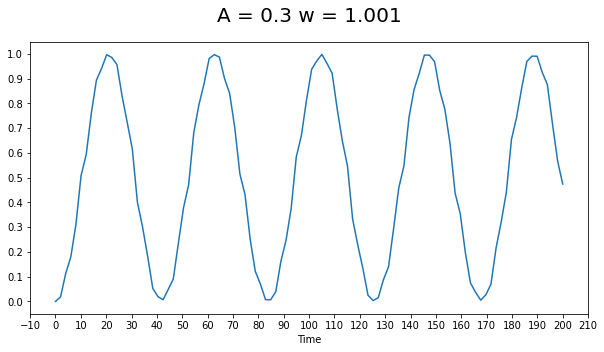

In [87]:
A = 0.3
w = 1.001
Ntime = 100
tmax = 200
tlist = np.linspace(0, tmax, Ntime)
#frequency of the field exciting the qubit



def hamiltonian_t(t, args):
        H0 = args['H0']
        H1 = args['H1']
        #H2  = args['H2']
        return H0 + H1*Theta(t) #+H2

ListPsiPsi=[]
listTheta=[]

def hamiltonian_t(t, args):
    H0 = args['H0']
    H1 = args['H1']
    w  = args['w']
    return H0 + H1*np.cos(w*t) 

H0 = -0.5*wq*sz
H1 = - 0.5*A*sx

H_args = {'H0': H0, 'H1': H1, 'w': w}

ListPsiPsi=[]  
for j in range(Ntime):
        ListPsiPsi.append(0.)

output = sesolve(hamiltonian_t, psi0, tlist, [], H_args, progress_bar=True) # sm.dag() * sm, H_args) 
for i in range(Ntime):
    ListPsiPsi[i]=linalg.blas.cdotc(output.states[i][1],output.states[i][1]).real
    #print(ListPsiPsi)
    


fig, axes = plt.subplots(figsize=(10,5))
axes.plot(tlist,  ListPsiPsi, label="qubit")
axes.set_xlabel('Time')
axes.set_title('A = '+str(A)+' w = '+str(w), fontsize=20, pad=20)
axes.tick_params(labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()


fig.savefig('saved_naselennost.png', dpi=100)


progress  0 of 50
progress  1 of 50
progress  2 of 50
progress  3 of 50
progress  4 of 50
progress  5 of 50
progress  6 of 50
progress  7 of 50
progress  8 of 50
progress  9 of 50
progress  10 of 50
progress  11 of 50
progress  12 of 50
progress  13 of 50
progress  14 of 50
progress  15 of 50
progress  16 of 50
progress  17 of 50
progress  18 of 50
progress  19 of 50
progress  20 of 50
progress  21 of 50
progress  22 of 50
progress  23 of 50
progress  24 of 50
progress  25 of 50
progress  26 of 50
progress  27 of 50
progress  28 of 50
progress  29 of 50
progress  30 of 50
progress  31 of 50
progress  32 of 50
progress  33 of 50
progress  34 of 50
progress  35 of 50
progress  36 of 50
progress  37 of 50
progress  38 of 50
progress  39 of 50
progress  40 of 50
progress  41 of 50
progress  42 of 50
progress  43 of 50
progress  44 of 50
progress  45 of 50
progress  46 of 50
progress  47 of 50
progress  48 of 50
progress  49 of 50


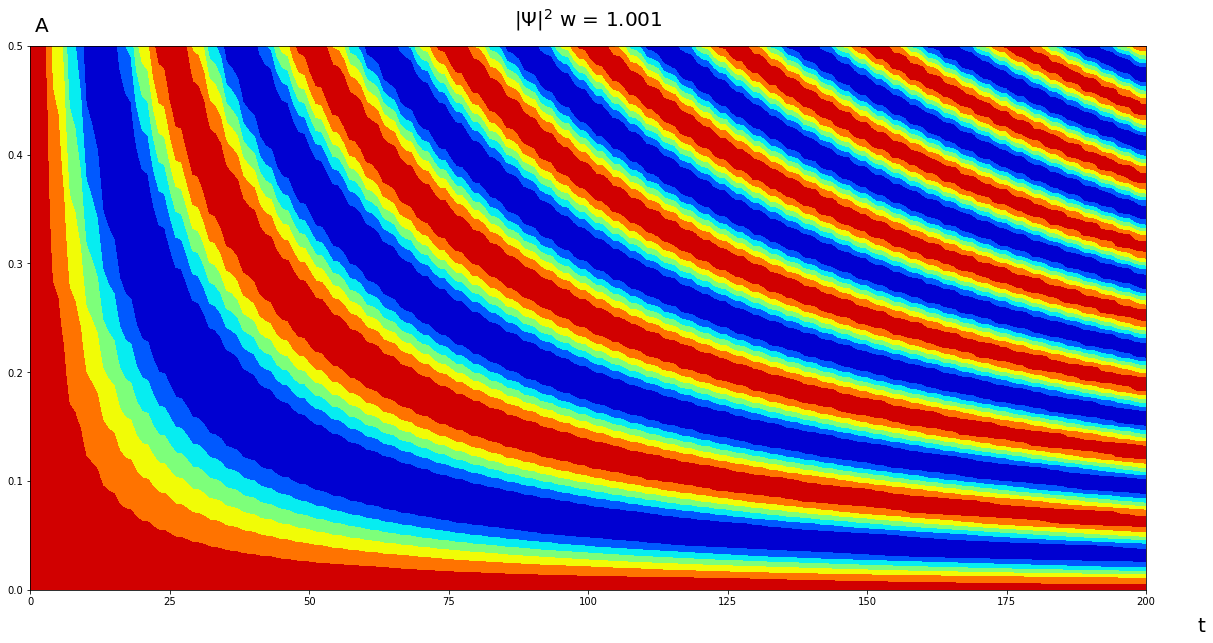

In [92]:
#sesolve - Schrödinger equation
#mesolve - Evolution of a density matrix
#output = mesolve(hamiltonian_t, psi0, tlist, c_ops, [sm.dag() * sm], H_args)

ListPsiPsi1=[]
def amlitudtime(Num_A):
    tmax = 200
    Ntime= 200
    w = 1.001 
    Alist = np.linspace(0, 0.5, Num_A)
    tlist = np.linspace(0, tmax, Ntime)
    for j in range(Num_A):
            ListPsiPsi1.append(Ntime*[0])
    for i in range(Num_A):
        A = Alist[i]
        print("progress ", i ,"of", Num_A )
        H0 = - 0.5*wq*sigmaz()
        H1 = - 0.5*A*sigmax()
        output = sesolve(hamiltonian_t, psi0, tlist, [], {'H0': H0, 'H1': H1, 'w': w}) # sm.dag() * sm, H_args) 
        for j in range(Ntime):
            ListPsiPsi1[i][j]=linalg.blas.cdotc(output.states[j][0],output.states[j][0]).real


    fig, ax = plt.subplots(figsize=(20,10))
    X,Y = np.meshgrid(tlist, Alist)
    Z = np.asarray(ListPsiPsi1, dtype=float)
    cp = ax.contourf(X, Y, Z, cmap='jet')

    ax.set_title('$|Ψ|^2$ ' + 'w = ' +str(w) , fontsize=20, pad=20) #$|Sx|^2$
    ax.set_ylabel('A', rotation=0, fontsize=20, labelpad=20)
    ax.set_xlabel('t', rotation=0, fontsize=20, labelpad=20)
    axes.tick_params(labelsize=10)
    axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
    axes.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_label_coords(0.01, 1.02)
    ax.xaxis.set_label_coords(1.05, -0.05)
    plt.show()
    fig.savefig('saved_Amplitude_depend.png', dpi=200)
    
Num_A = 50
amlitudtime(Num_A)
#axes.set_ylabel('Occupation probability')
#axes.set_title('Vacuum Rabi oscillations')

progress  0 of 50
progress  1 of 50
progress  2 of 50
progress  3 of 50
progress  4 of 50
progress  5 of 50
progress  6 of 50
progress  7 of 50
progress  8 of 50
progress  9 of 50
progress  10 of 50
progress  11 of 50
progress  12 of 50
progress  13 of 50
progress  14 of 50
progress  15 of 50
progress  16 of 50
progress  17 of 50
progress  18 of 50
progress  19 of 50
progress  20 of 50
progress  21 of 50
progress  22 of 50
progress  23 of 50
progress  24 of 50
progress  25 of 50
progress  26 of 50
progress  27 of 50
progress  28 of 50
progress  29 of 50
progress  30 of 50
progress  31 of 50
progress  32 of 50
progress  33 of 50
progress  34 of 50
progress  35 of 50
progress  36 of 50
progress  37 of 50
progress  38 of 50
progress  39 of 50
progress  40 of 50
progress  41 of 50
progress  42 of 50
progress  43 of 50
progress  44 of 50
progress  45 of 50
progress  46 of 50
progress  47 of 50
progress  48 of 50
progress  49 of 50


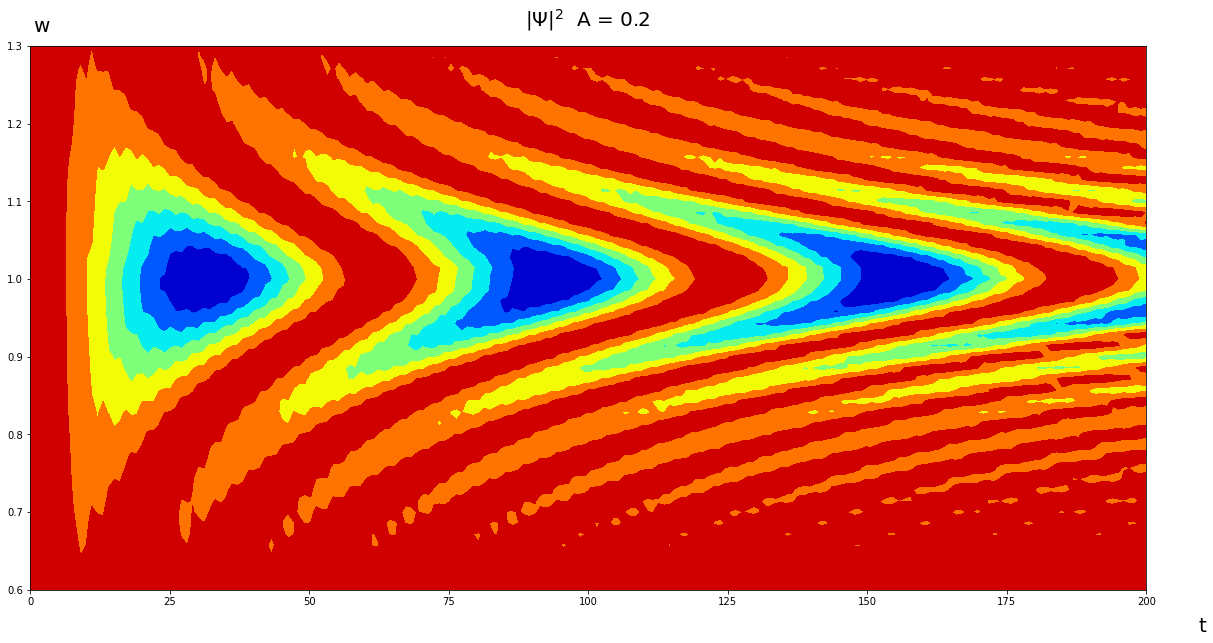

In [96]:
#sesolve - Schrödinger equation
#mesolve - Evolution of a density matrix
#output = mesolve(hamiltonian_t, psi0, tlist, c_ops, [sm.dag() * sm], H_args)
tmax = 200
Ntime= 200
tlist = np.linspace(0, tmax, Ntime)
ListPsiPsi2=[]

def frequency(Num_w):
    wq = 1
    A = 0.2
    def hamiltonian_t(t, args):
        H0 = args['H0']
        H1 = args['H1']
        w  = args['w']
        np.exp(1j*t).real
        return H0 + H1*np.cos(w*t)#(np.exp(1j*t) ** w).real

    H0 = -0.5*wq*sz
    H1 = - 0.5*A*sx
    w= 1.
    H_args = {'H0': H0, 'H1': H1, 'w': w}

    wlist = np.linspace(0.6, 1.3, Num_w)
    for j in range(Num_w):
            ListPsiPsi2.append(Ntime*[0])
    for i in range(Num_w):
        w = wlist[i]
        print("progress ", i ,"of", Num_w )
        output = sesolve(hamiltonian_t, psi0, tlist, [], {'H0': H0, 'H1': H1, 'w': w}) # sm.dag() * sm, H_args) 
        for j in range(Ntime):
            ListPsiPsi2[i][j]=linalg.blas.cdotc(output.states[j][0],output.states[j][0]).real



    fig, ax = plt.subplots(figsize=(20,10))
    X,Y = np.meshgrid(tlist, wlist)
    Z = np.asarray(ListPsiPsi2, dtype=float)
    cp = ax.contourf(X, Y, Z, cmap='jet')

    ax.set_title('$|Ψ|^2$  ' +'A = ' + str(A), fontsize=20, pad=20) #$|Sx|^2$
    ax.set_ylabel('w', rotation=0, fontsize=20, labelpad=20)
    ax.set_xlabel('t', rotation=0, fontsize=20, labelpad=20)
    axes.tick_params(labelsize=10)
    axes.xaxis.set_major_locator(ticker.MultipleLocator(25))
    ax.yaxis.set_label_coords(0.01, 1.02)
    ax.xaxis.set_label_coords(1.05, -0.05)
    plt.show()
    fig.savefig('saved_frecv_depend.png', dpi=200)

Num_w = 50
frequency(Num_w)


#axes.set_ylabel('Occupation probability')
#axes.set_title('Vacuum Rabi oscillations')

progress  0 of 50
progress  1 of 50
progress  2 of 50
progress  3 of 50
progress  4 of 50
progress  5 of 50
progress  6 of 50
progress  7 of 50
progress  8 of 50
progress  9 of 50
progress  10 of 50
progress  11 of 50
progress  12 of 50
progress  13 of 50
progress  14 of 50
progress  15 of 50
progress  16 of 50
progress  17 of 50
progress  18 of 50
progress  19 of 50
progress  20 of 50
progress  21 of 50
progress  22 of 50
progress  23 of 50
progress  24 of 50
progress  25 of 50
progress  26 of 50
progress  27 of 50
progress  28 of 50
progress  29 of 50
progress  30 of 50
progress  31 of 50
progress  32 of 50
progress  33 of 50
progress  34 of 50
progress  35 of 50
progress  36 of 50
progress  37 of 50
progress  38 of 50
progress  39 of 50
progress  40 of 50
progress  41 of 50
progress  42 of 50
progress  43 of 50
progress  44 of 50
progress  45 of 50
progress  46 of 50
progress  47 of 50
progress  48 of 50
progress  49 of 50


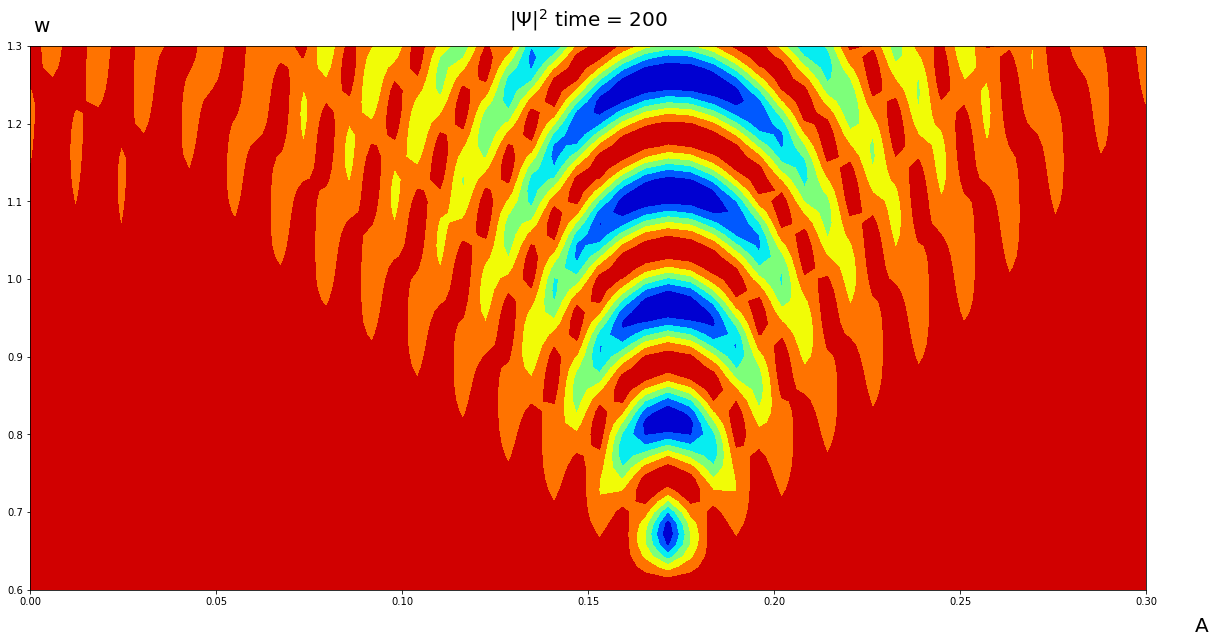

In [91]:
#sesolve - Schrödinger equation
#mesolve - Evolution of a density matrix
#output = mesolve(hamiltonian_t, psi0, tlist, c_ops, [sm.dag() * sm], H_args)
tmax = 400
Ntime= 400



def frequency(Num_w,Num_A, time):
    wq = 1
    def hamiltonian_t(t, args):
        H0 = args['H0']
        H1 = args['H1']
        w  = args['w']
        np.exp(1j*t).real
        return H0 + H1*np.cos(w*t)#(np.exp(1j*t) ** w).real
    tlist = np.linspace(0, time, int(time/4))
    H0 = - 0.5*wq*sz
    w= 1.

    ListPsiPsi=[]
    wlist = np.linspace(0.6, 1.3, Num_w)
    Alist = np.linspace(0, 0.3, Num_A)
    for j in range(Num_w):
            ListPsiPsi.append(Num_A*[0])            
    for i in range(Num_A):
        A = Alist[i]
        H1 = - 0.5*A*sx
        print("progress ", i ,"of", Num_A)
        for j in range(Num_w):
            w = wlist[j]
            output = sesolve(hamiltonian_t, psi0, tlist, [], {'H0': H0, 'H1': H1, 'w': w}) # sm.dag() * sm, H_args) 
            ListPsiPsi[i][j]=linalg.blas.cdotc(output.states[int(time/4)-1][0],output.states[int(time/4)-1][0]).real


    fig, ax = plt.subplots(figsize=(20,10))
    X,Y = np.meshgrid(Alist , wlist)
    Z = np.asarray(ListPsiPsi, dtype=float)
    cp = ax.contourf(X, Y, Z, cmap='jet')

    ax.set_title('$|Ψ|^2$ time = '+str(time), fontsize=20, pad=20) #$|Sx|^2$
    ax.set_ylabel('w', rotation=0, fontsize=20, labelpad=20)
    ax.set_xlabel('A', rotation=0, fontsize=20, labelpad=20)
    ax.tick_params(labelsize=10)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_label_coords(0.01, 1.02)
    ax.xaxis.set_label_coords(1.05, -0.05)
    plt.show()
    fig.savefig('saved_figure_test22_0.png', dpi=200)

Num_A = 50
Num_w = 50
time = 200
frequency(Num_w,Num_A, time)


#axes.set_ylabel('Occupation probability')
#axes.set_title('Vacuum Rabi oscillations')

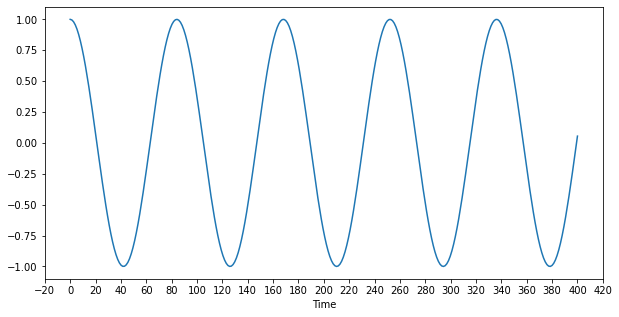

In [75]:
import matplotlib.ticker as ticker
tmax = 400
Ntime= 300
tlist = np.linspace(0, tmax, Ntime)
dt=0.1
ListPsiPsi =[]
for j in range(Ntime):
    ListPsiPsi.append(np.exp(1j*j*dt).real)



fig, axes = plt.subplots(figsize=(10,5))
axes.plot(tlist,  ListPsiPsi, label="qubit")
axes.set_xlabel('Time')
axes.tick_params(labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.show()

In [52]:
2**2.2

4.59479341998814

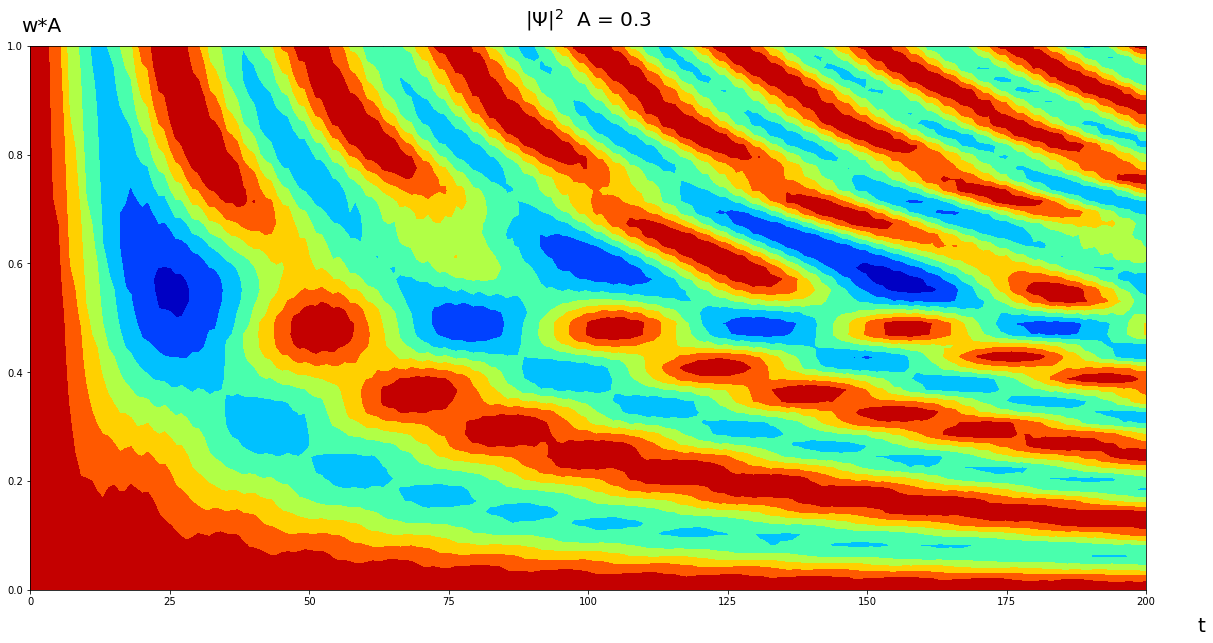

In [97]:
ListPsiPsiOut=[]
onelist=[]
nlist = np.linspace(0., 1., 50)
for i in range(Num_w):
    onelist.append(Ntime*[1.])
for i in range(Num_w):
    ListPsiPsiOut.append(Ntime*[0]) 
for i in range(len(ListPsiPsi1)):
    for j in range(len(ListPsiPsi2[0])):
        ListPsiPsiOut[i][j]=(ListPsiPsi1[i][j]+onelist[i][j])*(ListPsiPsi2[i][j]++onelist[i][j])
        
fig, ax = plt.subplots(figsize=(20,10))
X,Y = np.meshgrid(tlist, nlist)
Z = np.asarray(ListPsiPsiOut, dtype=float)
cp = ax.contourf(X, Y, Z, cmap='jet')

ax.set_title('$|Ψ|^2$  ' +'A = ' + str(A), fontsize=20, pad=20) #$|Sx|^2$
ax.set_ylabel('w*A', rotation=0, fontsize=20, labelpad=20)
ax.set_xlabel('t', rotation=0, fontsize=20, labelpad=20)
axes.tick_params(labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_label_coords(0.01, 1.02)
ax.xaxis.set_label_coords(1.05, -0.05)
plt.show()
fig.savefig('map.png', bbox_inches ="tight", dpi=200)